In [1]:
# Part 1
def round_3x4(matrix):
    # First row (index 0, 1, 2, 3)
    matrix[0][0] = round(matrix[0][0] / 1) * 1  # term1
    matrix[0][2] = round(matrix[0][2] / 1) * 1  # term3
    matrix[0][1] = max(0, min(round(matrix[0][1] / 0.04) * 0.04, 0.04))  # term2
    matrix[0][3] = round(matrix[0][3] / 1) * 1  # term4
    # Second row (index 1, 2, 3, 4)
    matrix[1][0] = max(-0.05, min(round(matrix[1][0] / 0.01) * 0.01, 0.40))  # term5
    matrix[1][1] = max(-0.04, min(round(matrix[1][1] / 0.04) * 0.04, 0.04))  # term6
    matrix[1][2] = max(-0.7, min(round(matrix[1][2] / 0.1) * 0.1, 0.1))  # term7
    matrix[1][3] = round(matrix[1][3] / 1) * 1  # term8
    # Third row (similar constraints as the second row)
    matrix[2][0] = max(-0.05, min(round(matrix[2][0] / 0.01) * 0.01, 0.40))  # term9 
    matrix[2][1] = max(-0.04, min(round(matrix[2][1] / 0.04) * 0.04, 0.04))  # term10 
    matrix[2][2] = max(-0.7, min(round(matrix[2][2] / 0.1) * 0.1, 0.1))  # term11
    matrix[2][3] = round(matrix[2][3] / 1) * 1  # term12
    return matrix
import numpy as np
from itertools import product
from scipy.spatial import KDTree

term1 = 1
term3 = 1
term2 = np.arange(0, 0.05, 0.04) 
term2 = np.around(term2, decimals=2)
term4 = 1 

term5 = np.arange(-0.05, 0.41, 0.01)
term5 = np.around(term5, decimals=2)
term6 = np.arange(-0.04, 0.05, 0.04)
term6 = np.around(term6, decimals=2)
term7 = np.arange(-0.7, 0.19, 0.1)
term7 = np.around(term7, decimals=2)
term8 = 1

term9 = np.arange(-0.05, 0.41, 0.01)
term9 = np.around(term9, decimals=2)
term10 = np.arange(-0.04, 0.05, 0.04) 
term10 = np.around(term10, decimals=2)
term11 = np.arange(-0.7, 0.19, 0.1) 
term11 = np.around(term11, decimals=2)
term12 = 1

combinations = product(term2, term5, term6, term7, term9, term10, term11)

states = [
    np.array([
        [term1, t2, term3, term4],
        [t5, t6, t7, term8],
        [t9, t10, t11, term12]
    ])
    for t2, t5, t6, t7, t9, t10, t11 in combinations
]
print(len(states))
flattened_states = [matrix.flatten() for matrix in states]
kdtree = KDTree(flattened_states)

def find_nearest_kdtree(target_matrix, kdtree, matrix_list):
    target_flat = target_matrix.flatten()
    dist, index = kdtree.query(target_flat)
    return index, matrix_list[index]


3085128


In [2]:
# Part 2
import gymnasium as gym
import highway_env
import numpy as np
import random
# Create the environment
config = {
    "observation": {
        "type": "Kinematics",
        "features": ["x", "y", "vx", "vy"],
        "features_range": {
            "x": [-100, 100],
            "y": [-100, 100],
            "vx": [-20, 20],
            "vy": [-20, 20]
        },
        "absolute": False,
        "lanes_count": 2,
        "vehicles_count": 3
    },
        "order": "sorted",
        "lanes_count": 2,
        "vehicles_count": 30,
        "right_lane_reward": 0,
        "absolute": False
}
env = gym.make('highway-fast-v0', config=config)
num_episodes = 30000
# alpha = 0.05       # Learning rate
gamma = 0.97      # Discount factor
# List to store total rewards and actions for each episode
# total_rewards = []
# action_length = []
# visited_time = [0] * 3085128
# state_policy = [1] * 3085128
# state_V = [0] * 3085128
# change_time = [0] * 3085128

In [10]:
# part 3
import pickle
with open("state_policy.pkl", "rb") as f:
    state_policy = pickle.load(f)
with open("state_V.pkl", "rb") as f:
    state_V = pickle.load(f)
with open("total_rewards.pkl", "rb") as f:
    total_rewards = pickle.load(f)
with open("action_length.pkl", "rb") as f:
    action_length = pickle.load(f)
with open("visit_time.pkl", "rb") as f:
    visited_time = pickle.load(f)
with open("change_time.pkl", "rb") as f:
    change_time = pickle.load(f)

In [4]:
# part 4
import copy
num_episodes = 1000
for episode in range(num_episodes):
    num_action = 0
    state, _ = env.reset()
    done = False
    episode_reward = 0 
    while not done:
        next_state_V0 = 0
        next_state_V1 = 0
        next_state_V2 = 0
        next_state_V3 = 0
        next_state_V4 = 0
        state_tuple = round_3x4(state)
        # print(state_tuple)
        nearest_index, nearest_matrix = find_nearest_kdtree(state_tuple, kdtree, states)
        visited_time[nearest_index]+=1
        action0 = 0
        action1 = 1
        action2 = 2
        action3 = 3
        action4 = 4
        env_checkpoint = copy.deepcopy(env)
        next_state0, reward0, done0, additional_info0, info0 = env.step(action0)
        env = copy.deepcopy(env_checkpoint)
        next_state1, reward1, done1, additional_info1, info1 = env.step(action1)
        env = copy.deepcopy(env_checkpoint)
        next_state2, reward2, done2, additional_info2, info2 = env.step(action2)
        env = copy.deepcopy(env_checkpoint)
        next_state3, reward3, done3, additional_info3, info3 = env.step(action3)
        env = copy.deepcopy(env_checkpoint)
        next_state4, reward4, done4, additional_info4, info4 = env.step(action4)
        env = copy.deepcopy(env_checkpoint)
        if done0 == True:
          reward0 -= 3
        if done1 == True:
          reward1 -=3
        if done2 == True:
          reward2 -=3
        if done3 == True:
          reward3 -=3
        if done4 == True:
          reward4 -=3
        NS0 = round_3x4(next_state0)
        NS1 = round_3x4(next_state1)
        NS2 = round_3x4(next_state2)
        NS3 = round_3x4(next_state3)
        NS4 = round_3x4(next_state4)
        # print(NS0, NS1, NS2, NS3, NS4)
        nearest_index0, nearest_matrix0 = find_nearest_kdtree(NS0, kdtree, states)
        nearest_index1, nearest_matrix1 = find_nearest_kdtree(NS1, kdtree, states)
        nearest_index2, nearest_matrix2 = find_nearest_kdtree(NS2, kdtree, states)
        nearest_index3, nearest_matrix3 = find_nearest_kdtree(NS3, kdtree, states)
        nearest_index4, nearest_matrix4 = find_nearest_kdtree(NS4, kdtree, states)
        next_state_V0 = state_V[nearest_index0]
        next_state_V1 = state_V[nearest_index1]
        next_state_V2 = state_V[nearest_index2]
        next_state_V3 = state_V[nearest_index3]
        next_state_V4 = state_V[nearest_index4]
        V0 = reward0 + gamma * next_state_V0
        V1 = reward1 + gamma * next_state_V1
        V2 = reward2 + gamma * next_state_V2
        V3 = reward3 + gamma * next_state_V3
        V4 = reward4 + gamma * next_state_V4
        action = np.argmax([V0, V1, V2, V3, V4])
        V0 = V0-state_V[nearest_index]
        V1 = V1-state_V[nearest_index]
        V2 = V2-state_V[nearest_index]
        V3 = V3-state_V[nearest_index]
        V4 = V4-state_V[nearest_index]
        this_state_V = [V0, V1, V2, V3, V4]
        next_s = [next_state0, next_state1, next_state2, next_state3, next_state4]
        next_d = [done0, done1, done2, done3, done4]
        next_r = [reward0, reward1, reward2, reward3, reward4]
        next_add = [additional_info0, additional_info1, additional_info2, additional_info3, additional_info4]
        next_info = [info0, info1, info2, info3, info4]
        if state_policy[nearest_index] != action:
           print("change policy from", state_policy[nearest_index],"to",action)
           change_time[nearest_index] += 1
        state_policy[nearest_index]=action
        state_V[nearest_index] = state_V[nearest_index] + (1/(visited_time[nearest_index])) * this_state_V[action] 
        # if random.random() < epsilon :
        #     a = random.choice([0, 1, 2, 3, 4])  # Explore
        # else:
        a = action  #explolite
        done = next_d[a]
        state = next_s[a]
        if a == 0:
            env.step(action0)
        elif a == 1:
            env.step(action1)
        elif a == 2:
            env.step(action2)
        elif a == 3:
            env.step(action3)
        elif a == 4:
            env.step(action4)
        print(visited_time[nearest_index], state_V[nearest_index], a, action, V0, V1, V2, V3, V4)
        reward = next_r[a]
        additional_info = next_add[a]
        info = next_info[a]
        num_action += 1
        episode_reward += reward
        if additional_info:
          done = True
    total_rewards.append(episode_reward)
    action_length.append(num_action)
    print("-------------------------------------------------------")
    print("Number of episde:                 ",episode,num_action)
    print("-------------------------------------------------------")

change policy from 1 to 3
256 3.817386038038232 3 3 -2.961963927957167 -2.961297554752114 -2.961297554752114 -0.26991970732529236 -3.0853422343523493
change policy from 1 to 0
151 2.654900701157578 0 0 1.232986965707069 -0.8019389657663181 -0.8019389657663181 -0.8019389657663181 -1.773257265580274
14 3.107880230966146 4 4 -1.9721765507413358 -1.9721765507413358 -0.6381845047835522 -1.9721765507413358 1.9044204230447281
8 4.178329987545579 4 4 -6.174795777947282 -6.174795777947282 -2.2648805562477823 -9.765036812470392 0.43165562037891014
71 3.948567885666202 0 0 0.7037615800138393 0.7037615800138393 -3.2225276671698633 -6.007527415987541 0.7037615800138393
231 4.046305853262115 0 0 -0.09930569461378136 -0.09930569461378136 -3.3324500337582776 -6.922322615325863 -0.09930569461378136
225 3.3342618430065394 0 0 0.3382194641142662 0.3382194641142662 -2.618472931102539 -9.118665445212821 0.3382194641142662
224 3.0351099334037177 2 2 -3.06559651615739 -3.06559651615739 -2.9067439069697363 -6

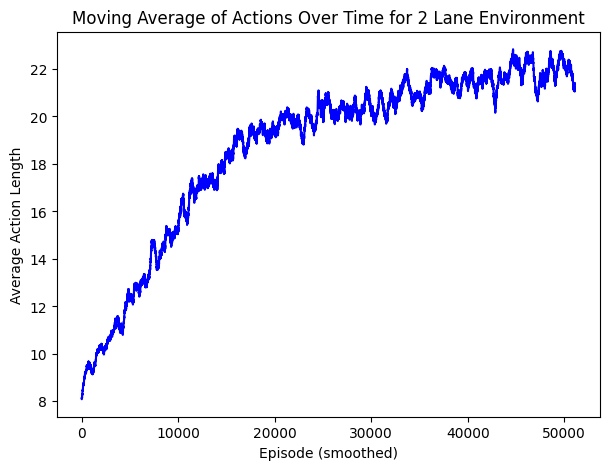

In [21]:
# part 5
import matplotlib.pyplot as plt
import numpy as np

window_size = 500
moving_avg = np.convolve(action_length, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(7, 5))
plt.plot(moving_avg, color='b')
plt.title("Moving Average of Actions Over Time for 2 Lane Environment")
plt.xlabel("Episode (smoothed)")
plt.ylabel("Average Action Length")
plt.show()

In [9]:
# part 6
import pickle
with open("state_policy.pkl", "wb") as f:
    pickle.dump(state_policy, f)
with open("state_V.pkl", "wb") as f:
    pickle.dump(state_V, f)
with open("total_rewards.pkl", "wb") as f:
    pickle.dump(total_rewards, f)
with open("action_length.pkl", "wb") as f:
    pickle.dump(action_length, f)
with open("visit_time.pkl", "wb") as f:
    pickle.dump(visited_time, f)
with open("change_time.pkl", "wb") as f:
    pickle.dump(change_time, f)

In [7]:
# part 7
testlength = []
testreward = []
percentage_30 = 0
newin=0
for q in range (100):
    test_action_length = 0
    rewardtest = 0
    done = False
    state, _ = env.reset()
    while not done:
        s1 = round_3x4(state)
        c1, c2 = find_nearest_kdtree(s1, kdtree, states)
        # if visited_time[c1]<=1 and test_action_length<=3 :
        #     newin+=1
        #     print(q, "n")
        action = state_policy[c1]
        n_state, reward, done, additional_info, info = env.step(action)
        test_action_length += 1
        # print(q, action, reward, c2)
        a = n_state
        rewardtest += reward
        # time.sleep(1)
        state = n_state
        if additional_info:
            done = True
    testlength.append(test_action_length)
    testreward.append(rewardtest)
percentage_30 = sum(1 for length in testlength if length >= 30) / 100 * 100
average_reward = sum(testreward) / 100

print(f"Success Rate: {percentage_30}%")
print(f"Average reward: {average_reward}")
print(newin)

Success Rate: 22.0%
Average reward: 13.402799688062952
0


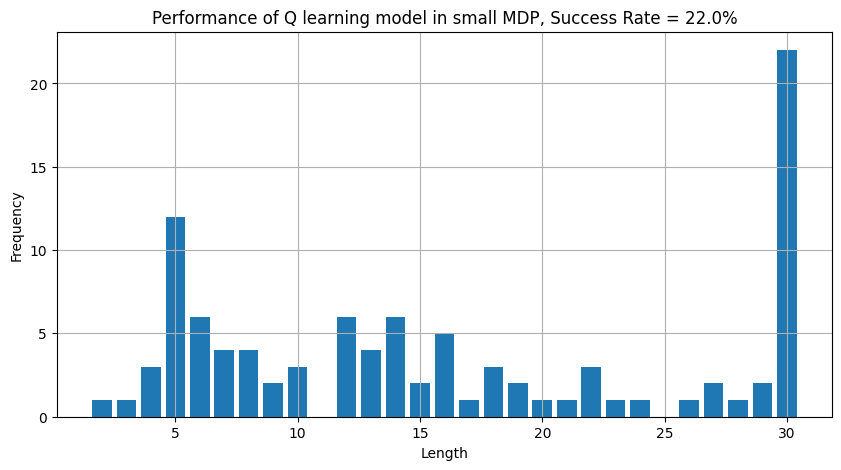

In [22]:
# part 8
import matplotlib.pyplot as plt
from collections import Counter
plt.figure(figsize=(10, 5))
frequency = Counter(testlength)
values = sorted(frequency.keys())
counts = [frequency[val] for val in values] 
plt.bar(values, counts)
plt.title(f"Performance of Q learning model in small MDP, Success Rate = {round(percentage_30,2)}%")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.grid()
plt.show()